In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [18]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [20]:
data["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1])

In [0]:
gradewise_list = []
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  gradewise_list.append(k)

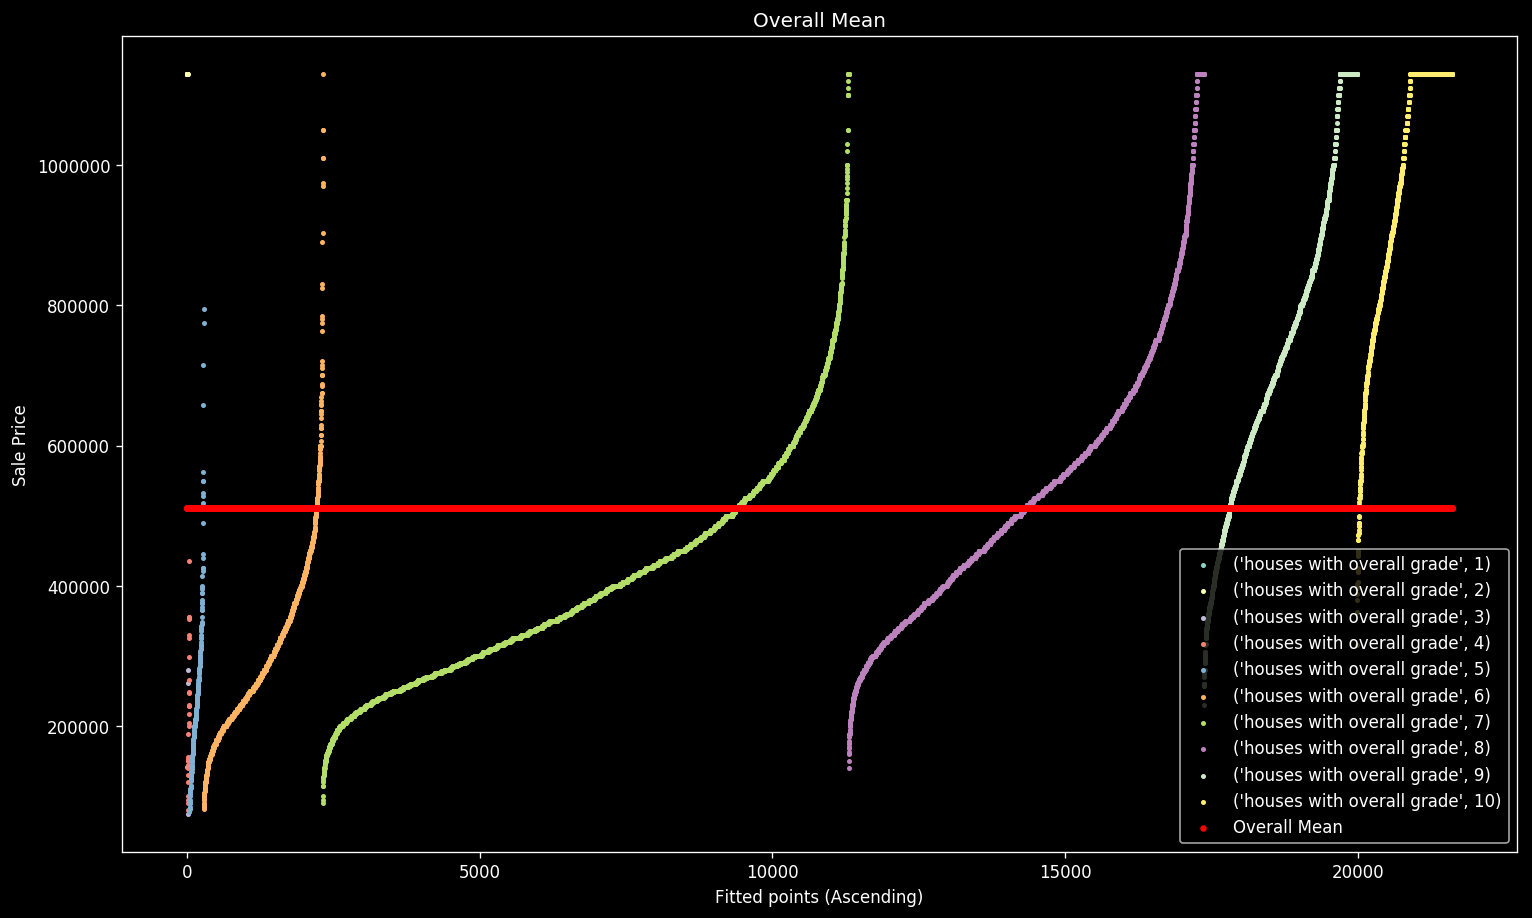

In [22]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # plotting
  plt.scatter( points, # x-axis
              np.sort(gradewise_list[i-1], axis = 0) , # y-axis
              label = ('houses with overall grade', i), s = 4 )            
  z = max(points) + 1 # updating z for next plot

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 8)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend( loc = 4)

In [23]:
grades_mean = data.pivot_table(values = 'Sale_Price' , columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [24]:
# making new column
data['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
  
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [16]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

NameError: ignored

<Figure size 1800x1080 with 0 Axes>

In [0]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

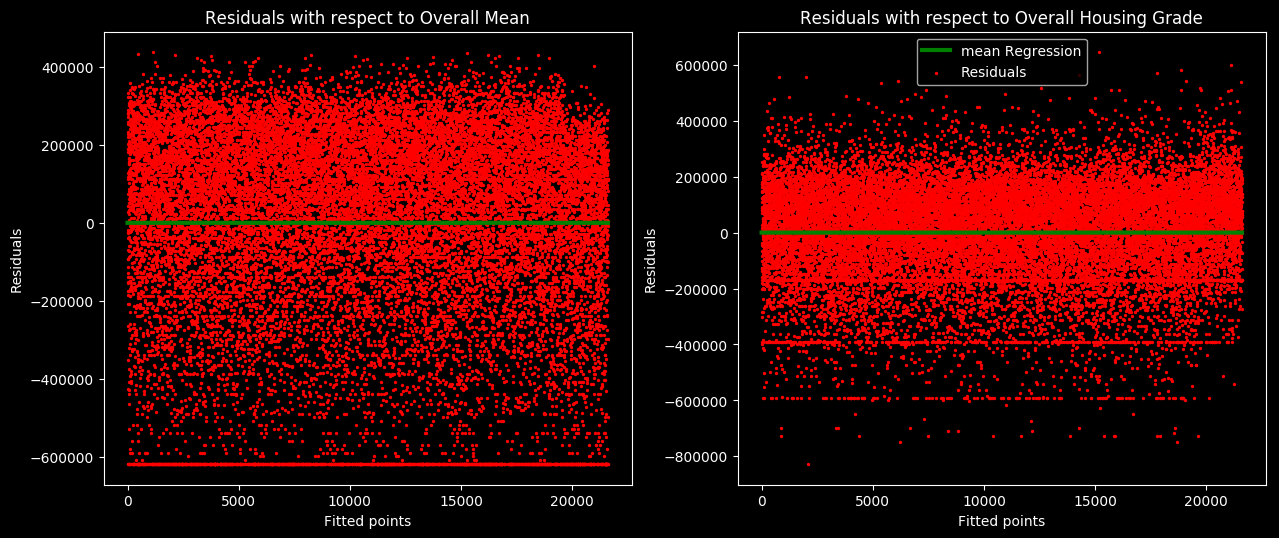

In [0]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

In [29]:
mean_error = sum(mean_difference)/len(data)
print(round(mean_error, 7))

0.0


In [30]:
Y = data["Sale_Price"]
Y_hat1 = data["mean_sales"]
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [33]:
mean_absolute_error1 = sum(abs(Y_hat1 - Y))/n
mean_absolute_error1

199168.78146839526

In [34]:
mean_absolute_error2 = sum(abs(Y_hat2 - Y))/n
mean_absolute_error2

137081.70298203363

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_2 = mean_absolute_error(Y_hat2, Y)
mean_absolute_error_2

137081.7029820291

In [0]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error( Y_hat1, Y)
mse2 = mean_squared_error(Y_hat2, Y)
mse1, mse2

(62528116847.799576, 30804835720.342426)

In [36]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error( Y_hat1, Y)**0.5
rmse2 = mean_squared_error(Y_hat2, Y)**0.5
rmse1, rmse2

(250056.2273725643, 175513.06424406826)

In [0]:
Y = data["Sale_Price"]
Y_bar = data["mean_sales"]
Y_hat = data['grade_mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [0]:
mse_mean = mean_squared_error( Y_bar, Y)
mse_mean

62528116847.799576

In [0]:
mse_model = mean_squared_error( Y_hat, Y)
mse_model

30804835720.342426

In [0]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

In [0]:
from sklearn.metrics import r2_score
score = r2_score(Y, Y_hat)
score

0.5073442592981836